# Basic analsis and plotting of model train-test performance

In [47]:
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import torch 
import torchvision.models as models
import matplotlib.pyplot as plt

In [60]:
project_dir = '../'
data_dir = '{}datasets/'.format(project_dir)
results_dir = '{}results/Exp_kaggle/'.format(project_dir)

Exp_kaggle_mateuszbuda_1, cuda test accuracy: 60.459
No handles with labels found to put in legend.
No handles with labels found to put in legend.
Exp_kaggle_mateuszbuda_2, cuda test accuracy: 47.464
Exp_kaggle_mateuszbuda_3, cuda test accuracy: 50.567
No handles with labels found to put in legend.
No handles with labels found to put in legend.
Exp_kaggle_mateuszbuda_4, cuda test accuracy: 52.446
No handles with labels found to put in legend.
Exp_kaggle_mateuszbuda_5, cuda test accuracy: 31.060
No handles with labels found to put in legend.
Exp_kaggle_mateuszbuda_6, cuda test accuracy: 43.637
No handles with labels found to put in legend.
Exp_kaggle_mateuszbuda_7, cuda test accuracy: 41.235
Exp_kaggle_mateuszbuda_8, cuda test accuracy: 40.548


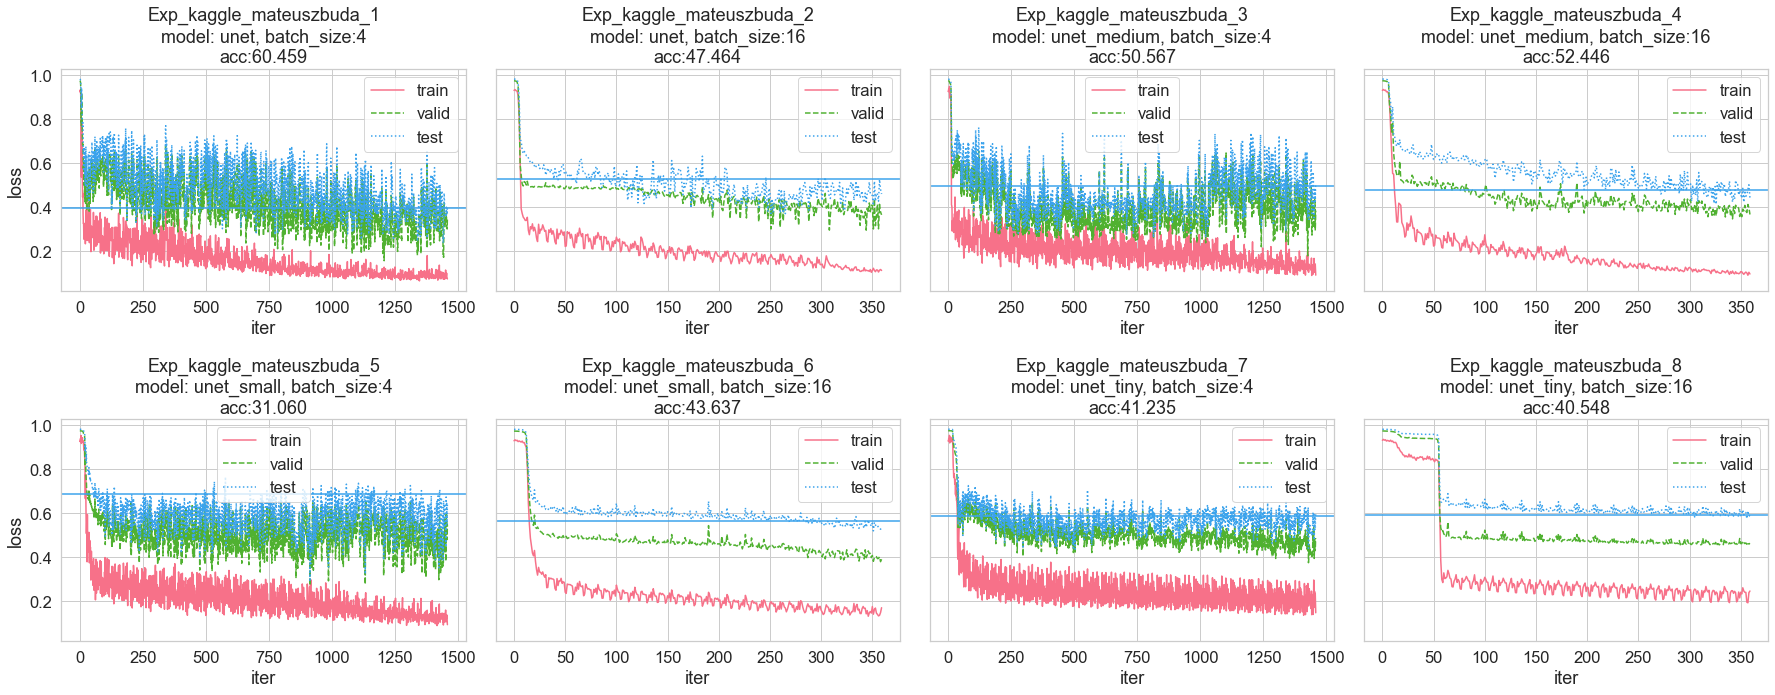

In [77]:
exp_idx = range(1,9)
exp_names = ['Exp_kaggle_mateuszbuda_{}'.format(i) for i in exp_idx] #['Exp_kaggle_mateuszbuda','Exp_kaggle_mateuszbuda_pruned']
devices = ['cuda']

pal = sns.color_palette("husl", 3)

sns.set(font_scale = 1.5)
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(2,4, figsize=(25,10),sharex=False,sharey=True)
    for e, exp_name in enumerate(exp_names):
        if len(exp_names) > 1:
            ax = axes.ravel()[e]
        else:
            ax = axes
        for d, device in enumerate(devices):
            iter_csv = '{}{}/{}/iter.csv'.format(results_dir, exp_name, device)
            iter_df = pd.read_csv(iter_csv)
            iter_df = iter_df.rename(columns={'Unnamed: 0':'iter'})

            exp_csv = '{}{}/{}/experiment_config.csv'.format(results_dir, exp_name, device)
            exp_df = pd.read_csv(exp_csv)
            test_perf = exp_df['test_perf'].values[0]
            print('{}, {} test accuracy: {:4.3f}'.format(exp_name, device, test_perf))

            test_loss = 1 - test_perf/100

            # plot 
            g = sns.lineplot(y='train_loss', x='iter', data=iter_df, ax=ax, label='train', color=pal[0])
            g = sns.lineplot(y='valid_loss', x='iter', linestyle='--', data=iter_df, ax=ax, label='valid', color=pal[1])
            g = sns.lineplot(y='test_loss', x='iter', linestyle=':', data=iter_df, ax=ax, label='test', color=pal[2])

            ax.axhline(test_loss, color=pal[2], linestyle='-')
            sub_title = '{}\nmodel: {}, batch_size:{}\nacc:{:4.3f}'.format(exp_name,exp_df['model'].values[0],exp_df['batch_size'].values[0],test_perf)
            ax.set_title(sub_title)
            ax.set_ylabel('loss')
            plt.legend(loc=1)
            plt.tight_layout()